In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('AMZN.csv')

In [3]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [5]:
df1.index = pd.to_datetime(df1['Date'], format='%Y-%m-%d')

In [6]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1997-05-15,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [37]:
df1['Close'] = df1['Close']/df1['Close'].abs().max()

In [8]:
del df1['Date']

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
sns.set()

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

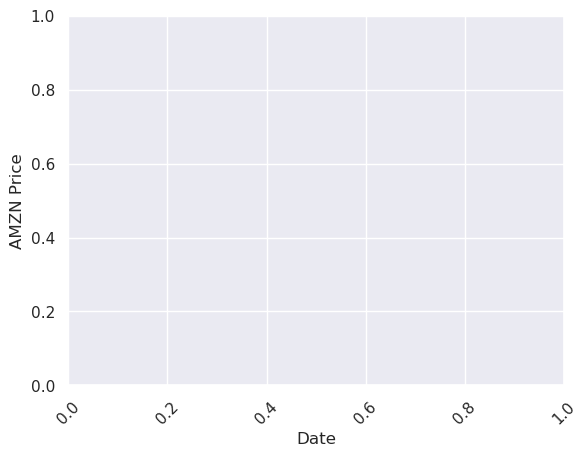

In [40]:
plt.ylabel('AMZN Price')
plt.xlabel('Date')
plt.xticks(rotation=45)

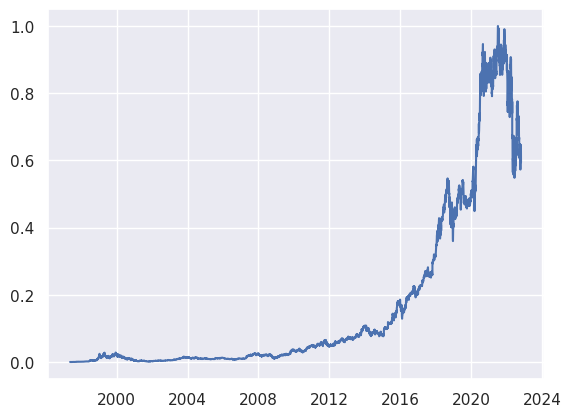

In [41]:
plt.plot(df1.index, df1['Close'], )

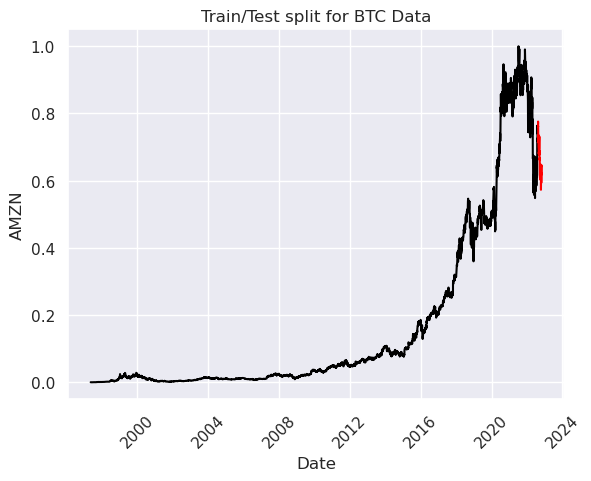

In [99]:
train = df1[df1.index < pd.to_datetime("2022-08-12", format='%Y-%m-%d')]
test = df1[df1.index > pd.to_datetime("2022-08-12", format='%Y-%m-%d')]

plt.plot(train.Close, color = "black")
plt.plot(test.Close, color = "red")
plt.ylabel('AMZN')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

In [100]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [101]:
y = train['Close']


In [102]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [103]:
ARMAmodel = ARMAmodel.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17127D+03    |proj g|=  3.70944D+05


 This problem is unconstrained.



At iterate    5    f= -1.52620D+00    |proj g|=  3.30880D+00

At iterate   10    f= -3.31095D+00    |proj g|=  1.95031D+01

At iterate   15    f= -3.49113D+00    |proj g|=  5.73231D+00

At iterate   20    f= -3.62529D+00    |proj g|=  5.65412D+00

At iterate   25    f= -3.64214D+00    |proj g|=  3.98064D-01

At iterate   30    f= -3.64433D+00    |proj g|=  9.98823D-02

At iterate   35    f= -3.64460D+00    |proj g|=  1.33752D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     37     83      1     0     0   1.742D-02  -3.645D+00
  F =  -3.6446112625732954     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [104]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


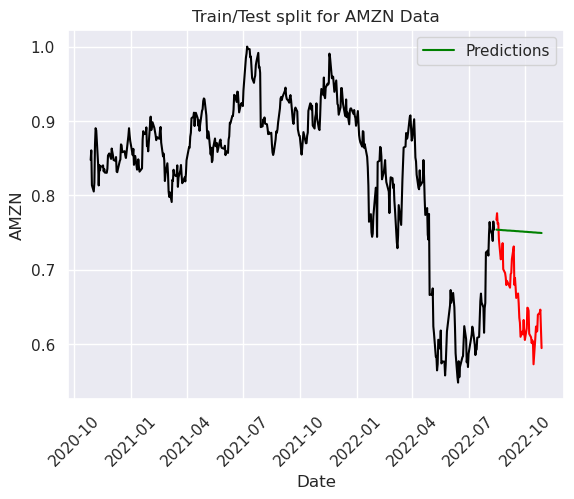

In [106]:
plt.plot(train.Close[-450:], color = "black")
plt.plot(test.Close, color = "red")
plt.ylabel('AMZN')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for AMZN Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

In [83]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

arma_rmse = mean_squared_error(test["Close"].values, y_pred_df["Predictions"])
mae = mean_absolute_error(test["Close"].values, y_pred_df["Predictions"])
print("MSE: ",arma_rmse)
print("MAE: ", mae)

MSE:  0.00395757825374152
MAE:  0.05417687147778552


In [84]:
from statsmodels.tsa.arima.model import ARIMA


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.

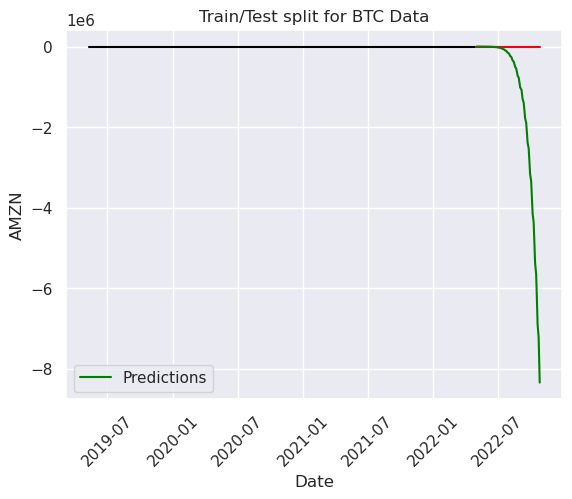

MSE:  5736901296250.068


In [86]:
ARIMAmodel = ARIMA(y, order = (8, 8, 8))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(train.Close[-750:], color = "black")
plt.plot(test.Close, color = "red")
plt.ylabel('AMZN')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = mean_squared_error(test["Close"].values, y_pred_df["Predictions"])
print("MSE: ",arma_rmse)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.49475D+00    |proj g|=  2.79725D-01


 This problem is unconstrained.



At iterate    5    f=  1.91098D+00    |proj g|=  1.40237D-01

At iterate   10    f=  1.85194D+00    |proj g|=  2.11944D-02

At iterate   15    f=  1.81076D+00    |proj g|=  8.99692D-02

At iterate   20    f=  1.75229D+00    |proj g|=  4.87105D-02

At iterate   25    f=  1.72034D+00    |proj g|=  1.98595D-02

At iterate   30    f=  1.69629D+00    |proj g|=  3.98521D-02
  ys=-1.025E-03  -gs= 1.388E-03 BFGS update SKIPPED
  ys=-7.489E-08  -gs= 3.790E-08 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     33     75      1     2     0   5.121D-02   1.696D+00
  F =   1.6961944425745761     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


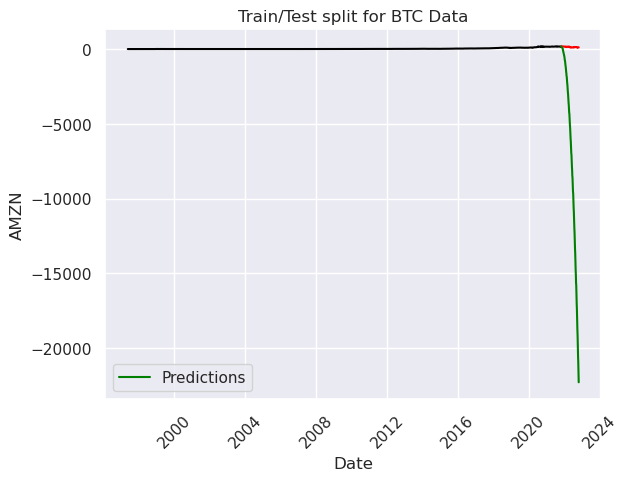

In [34]:
SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(train.Close, color = "black")
plt.plot(test.Close, color = "red")
plt.ylabel('AMZN')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()